# Support Vector Regression (SVR)

## Importing the Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import and Splitting the Dataset

In [68]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1: -1].values
y = dataset.iloc[:, -1].values

In [69]:
print('X : ', x)

X :  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [70]:
print('Y : ', y)

Y :  [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [71]:
y = y.reshape(len(y), 1)

In [72]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

y = sc_y.fit_transform(y)
x = sc_x.fit_transform(x)

In [74]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [75]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [76]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y.ravel())

SVR()

## Predicting a new result

In [77]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(1, 1))  #this changes the predicted feature scaled number to our normal state 

array([[170370.0204065]])

## Visualising the SVR results

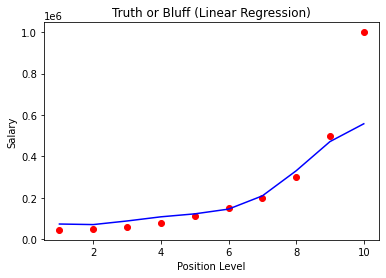

In [94]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')

plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1, 1)), color = 'blue')
         
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

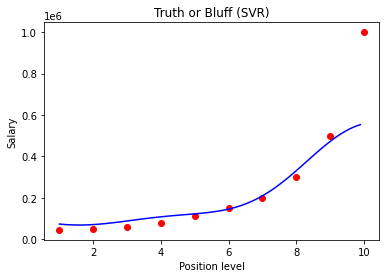

In [97]:
sc_X = sc_x
X = x

X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()